## K-Nearest Neighbors(KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [7]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

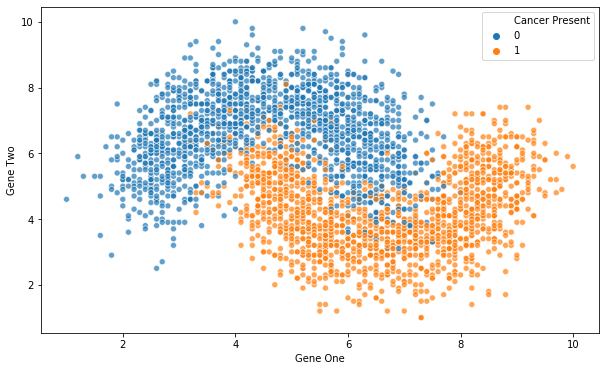

In [9]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

(4, 8)

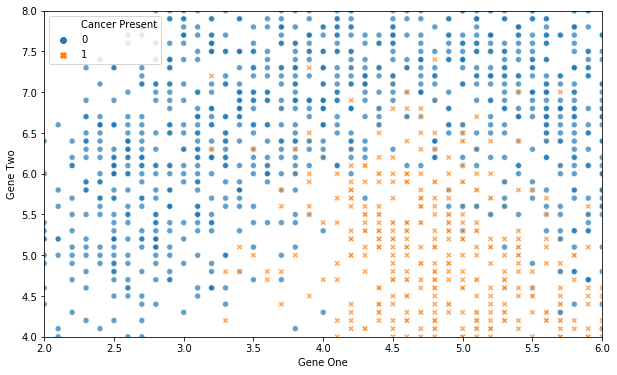

In [10]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

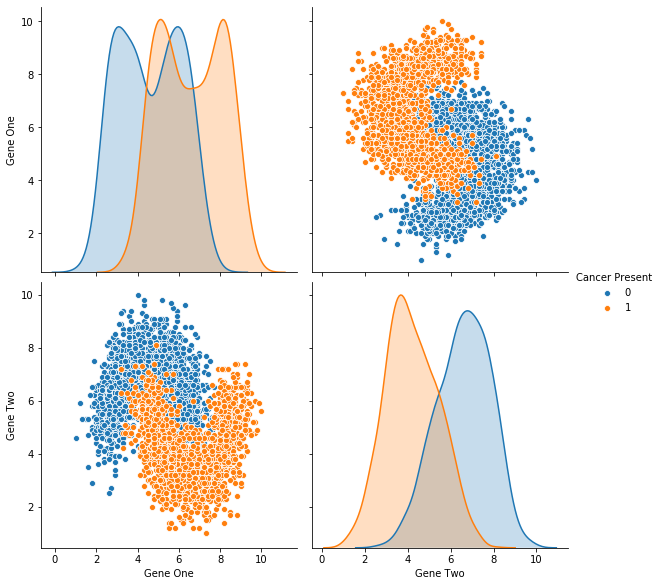

In [11]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1);

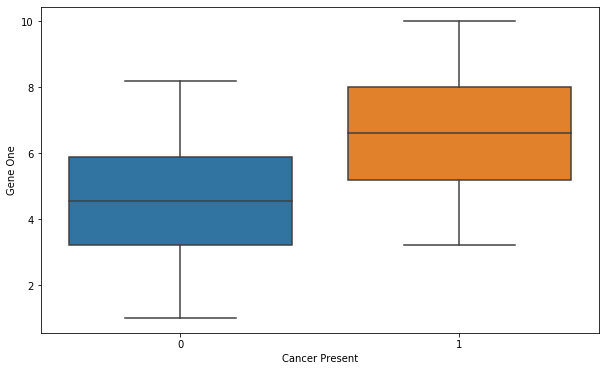

In [12]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df);

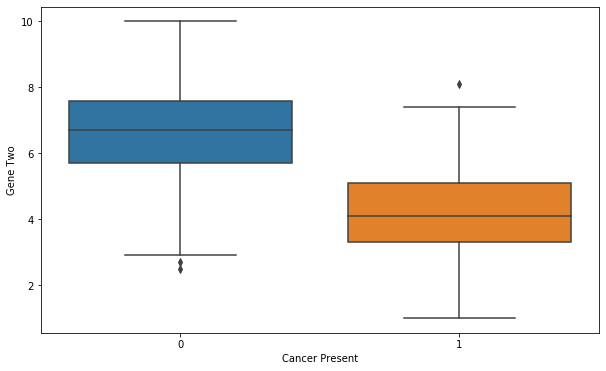

In [13]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df);

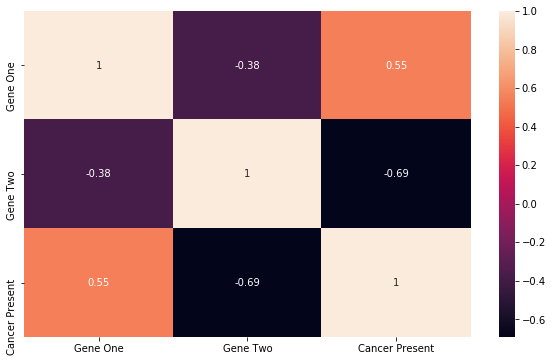

In [14]:
sns.heatmap(df.corr(), annot=True);

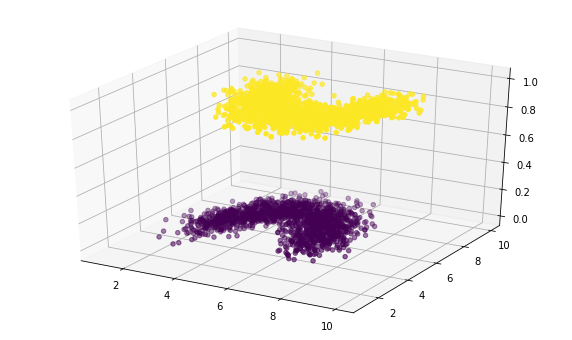

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# default degeri 5'tir

In [23]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [25]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [26]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [27]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [28]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
340,1,1,1.0,0.0
2689,1,1,1.0,0.0
1177,1,1,1.0,0.0
358,1,1,0.8,0.2
332,1,1,1.0,0.0
1289,0,0,0.0,1.0
195,1,1,1.0,0.0
1741,0,0,0.0,1.0
231,1,1,1.0,0.0
2069,0,0,0.0,1.0


## Model Performance on Classification Tasks

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [30]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

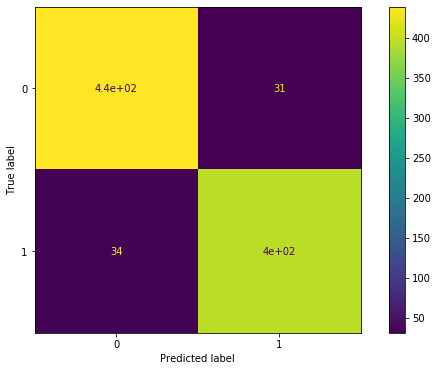

In [31]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values

In [37]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [38]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

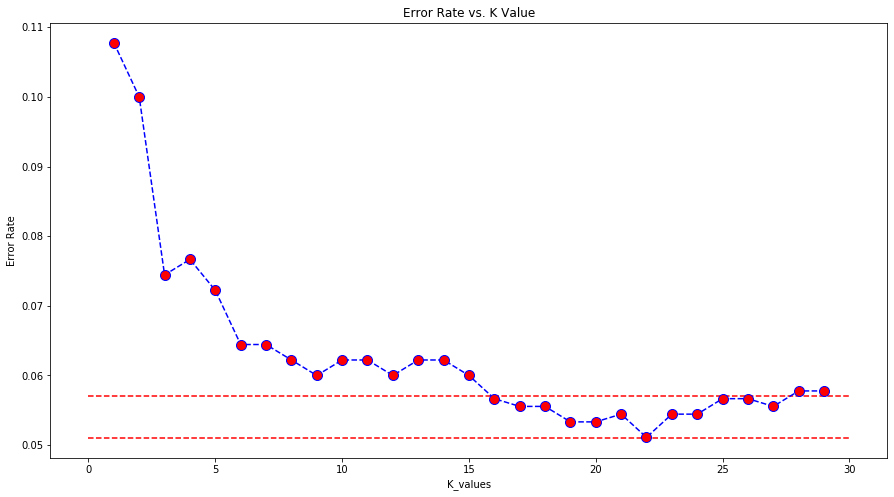

In [39]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

## Scores by Various K Values

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[420  50]
 [ 47 383]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


Train_Set

[[1005   25]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.98      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [42]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  69 1001]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [43]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[445  25]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 962   68]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [44]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[446  24]
 [ 30 400]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[958  72]
 [ 73 997]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Cross Validate For Optimal K Value

In [45]:
from sklearn.model_selection import cross_val_score, cross_validate

In [46]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002993,0.010003,0.914286,0.923810,0.906542,0.915094
2,0.001966,0.011292,0.947619,0.944444,0.953271,0.948837
3,0.001519,0.009986,0.947619,0.970588,0.925234,0.947368
4,0.001578,0.009362,0.866667,0.876190,0.859813,0.867925
5,0.000997,0.009830,0.923810,0.909910,0.943925,0.926606
6,0.001627,0.014009,0.909524,0.915094,0.906542,0.910798
7,0.001995,0.010042,0.933333,0.911504,0.962617,0.936364
8,0.001093,0.011251,0.938095,0.927273,0.953271,0.940092
9,0.001908,0.014589,0.961905,0.980583,0.943925,0.961905
10,0.001955,0.012965,0.895238,0.869565,0.934579,0.900901


In [47]:
df_scores.mean()[2:]

test_accuracy     0.923810
test_precision    0.922896
test_recall       0.928972
test_f1           0.925589
dtype: float64

## Predict New Observation

In [48]:
new_observation = [[3.5, 4.3]] 

In [49]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [50]:
knn_model.predict_proba(new_observation)

array([[0.34482759, 0.65517241]])

In [51]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [52]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [53]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
knn_grid = KNeighborsClassifier()

In [56]:
k_values= range(1,30)

In [57]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [58]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
# modelim dengede oldugu icin accuracy, farkli bir durum olsaydi farkli bir deger yazilabilirdi

In [59]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
knn_grid_model.best_params_
# grid search en iyi accuracy degerini veren k'yi verir
# bu da cok maliyetli olabilir
# bu sebeple elbow metodunu kullanmak daha mantiklidir

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [62]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[447  23]
 [ 27 403]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 957   73]
 [  70 1000]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [55]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

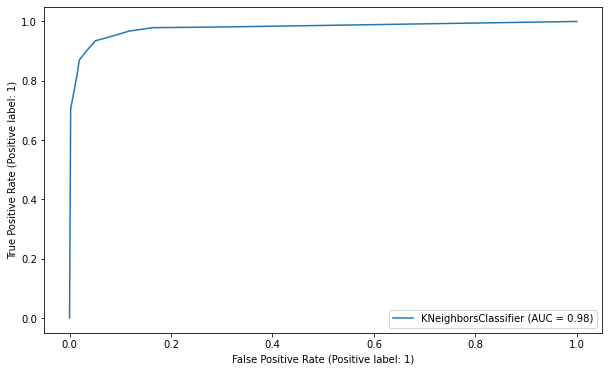

In [57]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [58]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

## Final Model and Model Deployment

In [59]:
import pickle

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X)

StandardScaler()

In [62]:
X_scaled = scaler.transform(X)

In [63]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)

In [64]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [65]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

## Predict New Observations

In [66]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [67]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [68]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [69]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [70]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [71]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [72]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [73]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=9)

In [74]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [75]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


## Pipeline

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split

Step 2: the scaler is fitted on the TRAINING data

Step 3: the scaler transforms TRAINING data

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler is used to transform the TEST data

Step 6: the trained models predict using the transformed TEST data

pipe.fit(X_train, y_train)--> scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

pipe.predict(X_test)      --> scaler.transform(X_test)      --> knn.predict(scaled_X_test)

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [78]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [79]:
pipe_model = Pipeline(steps=operations)

In [80]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [81]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

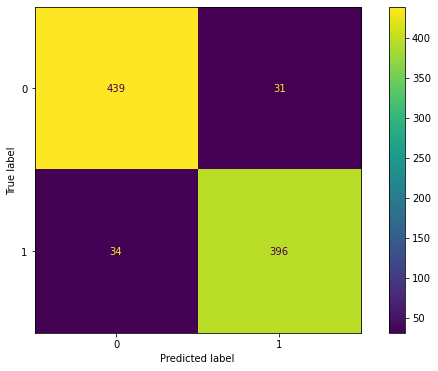

In [83]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Changing the parameters of the pipe_model

In [85]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [86]:
pipe_model.set_params(knn__n_neighbors= 9) #Euclidean

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [87]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [88]:
pipe_model['scaler']

StandardScaler()

In [89]:
pipe_model["knn"]

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'knn__n_neighbors': range(1,30)}

In [92]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [93]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [94]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

## CrossValidate on Pipeline

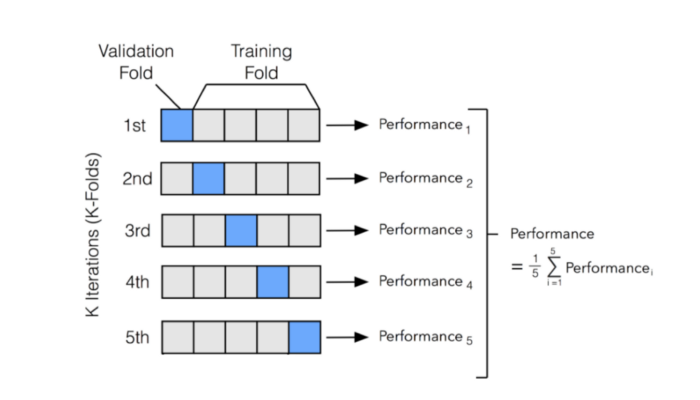

In [95]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.925515
test_recall       0.930841
test_f1           0.927874
test_accuracy     0.926190
dtype: float64

test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
test_accuracy     0.926190

## Final pipe_model 

In [97]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [98]:
pipe_final = Pipeline(operations)

In [99]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## Predict New Observations with pipe_model

In [100]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [101]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [102]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [103]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
